# Comparando dados
Com frequência, você deseja comparar dados em seu conjunto de dados para ver se consegue discernir tendências ou relacionamentos.

# 01. Dados univariados 

`Dados univariados` são dados que consistem em __apenas uma variável__ ou __recurso__. Embora possa parecer inicialmente que não há muito que possamos fazer para analisar dados univariados, já vimos que podemos explorar sua distribuição em termos de medidas de tendência central e medidas de variância. Também vimos como podemos visualizar essa distribuição usando histogramas e box plots.  
  
Aqui está um lembrete de como você pode visualizar a distribuição de dados univariados, usando nossos dados de notas de alunos com algumas observações adicionais na amostra:

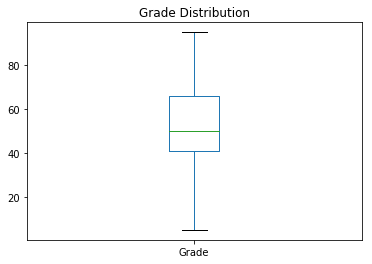

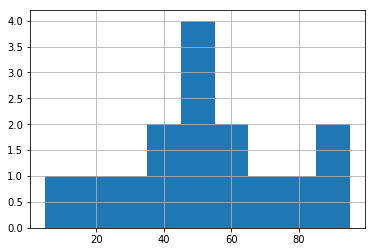

           Grade
count  15.000000
mean   51.533333
std    24.642781
min     5.000000
25%    41.000000
50%    50.000000
75%    66.000000
max    95.000000
median: 50.0


In [1]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt

df = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic', 'Jimmie', 'Rhonda', 'Giovanni', 'Francesca', 'Rajab', 'Naiyana', 'Kian', 'Jenny'],
                   'Grade':[50,50,46,95,50,5,57,42,26,72,78,60,40,17,85]})

# Cria um gráfico de caixa/box plot.
plt.figure()
df['Grade'].plot( kind='box', title='Grade Distribution')

# Cria um histograma.
plt.figure()
df['Grade'].hist(bins=9)

plt.show() # Exibe o plotgráfico/.
print(df.describe())
print('median: ' + str(df['Grade'].median()))

# 2. Dados Bivariados e Multivariados

Muitas vezes, pode ser útil comparar dados bivariados; __em outras palavras, compare duas variáveis, ou até mais__ (nesse caso, chamamos de dados multivariados).  
  
Por exemplo, os dados dos nossos alunos incluem três variáveis numéricas para cada aluno:  
  
 - O salário;  
 - O número de horas de trabalho por semana;  
 - E a nota final da escola.  
  
Veja a seguir o código para visualizar esse exemplo em uma tabela/DataFrame:

In [2]:
import pandas as pd

df = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic', 'Jimmie', 'Rhonda', 'Giovanni', 'Francesca', 'Rajab', 'Naiyana', 'Kian', 'Jenny'],
                   'Salary':[50000,54000,50000,189000,55000,40000,59000,42000,47000,78000,119000,95000,49000,29000,130000],
                   'Hours':[41,40,36,17,35,39,40,45,41,35,30,33,38,47,24],
                   'Grade':[50,50,46,95,50,5,57,42,26,72,78,60,40,17,85]})

df[['Name', 'Salary', 'Hours', 'Grade']]

,Name,Salary,Hours,Grade
0,Dan,50000,41,50
1,Joann,54000,40,50
2,Pedro,50000,36,46
3,Rosie,189000,17,95
4,Ethan,55000,35,50
5,Vicky,40000,39,5
6,Frederic,59000,40,57
7,Jimmie,42000,45,42
8,Rhonda,47000,41,26
9,Giovanni,78000,35,72


__NOTE:__  
Vamos supor que você queira comparar as distribuições dessas variáveis. Você pode simplesmente criar um boxplot para cada variável, assim:

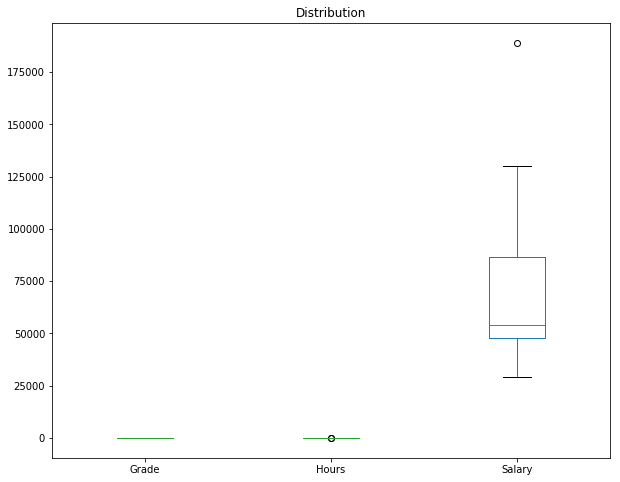

In [3]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt

df = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic', 'Jimmie', 'Rhonda', 'Giovanni', 'Francesca', 'Rajab', 'Naiyana', 'Kian', 'Jenny'],
                   'Salary':[50000,54000,50000,189000,55000,40000,59000,42000,47000,78000,119000,95000,49000,29000,130000],
                   'Hours':[41,40,36,17,35,39,40,45,41,35,30,33,38,47,24],
                   'Grade':[50,50,46,95,50,5,57,42,26,72,78,60,40,17,85]})


# Cria um gráfico de caixa/box plot.
df.plot(kind='box', title='Distribution', figsize = (10,8))
plt.show()

Hmm, isso não é particularmente útil, é?

O problema é que os dados são todos medidos em diferentes escalas. Os salários são tipicamente em dezenas de milhares, enquanto as horas e as notas são em dígitos simples ou duplos.

# 3. Normalizando dados
Quando você precisa comparar dados em diferentes unidades de medida, é possível normalizar ou dimensionar os dados para que os valores sejam medidos na mesma escala proporcional.  
  
Por exemplo, no Python, você pode usar um redimensionador __MinMax__ para normalizar várias variáveis numéricas para um valor proporcional entre 0 e 1, com base em seus valores mínimo e máximo.  
  
Veja o código a seguir:

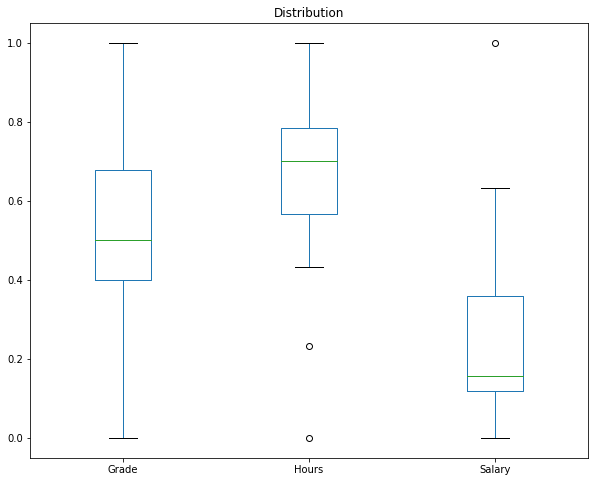

In [5]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt

 # Importa a objeto MinMaxScale da biblioteca Scikit-Learn.
from sklearn.preprocessing import MinMaxScaler

df = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic', 'Jimmie', 'Rhonda', 'Giovanni', 'Francesca', 'Rajab', 'Naiyana', 'Kian', 'Jenny'],
                   'Salary':[50000,54000,50000,189000,55000,40000,59000,42000,47000,78000,119000,95000,49000,29000,130000],
                   'Hours':[41,40,36,17,35,39,40,45,41,35,30,33,38,47,24],
                   'Grade':[50,50,46,95,50,5,57,42,26,72,78,60,40,17,85]})

# Cria uma instância do objeto MinMaxScaler()
scaler = MinMaxScaler()
# Normaliza od dados com o método fit_transform().
df[['Salary', 'Hours', 'Grade']] = scaler.fit_transform(df[['Salary', 'Hours', 'Grade']])

# Cria o plot/gráfico para exibir os dados normalizados.
df.plot(kind='box', title='Distribution', figsize = (10,8))
plt.show()

Agora os números no eixo y não são particularmente significativos, mas estão em uma escala similar.

# 4. Comparando Dados Bivariados com um Gráfico de Dispersão (Scatter Plot)

Quando você precisa comparar dois valores numéricos, um gráfico de dispersão pode ser uma ótima maneira de ver se existe alguma relação aparente entre eles, de modo que as alterações no valor de uma variável afetem o valor da outra.  
  
__NOTE:__  
Vamos dar uma olhada em um gráfico de dispersão de salário e notas:

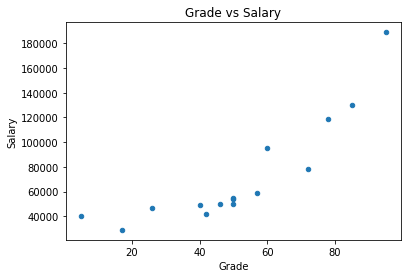

In [6]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt

df = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic', 'Jimmie', 'Rhonda', 'Giovanni', 'Francesca', 'Rajab', 'Naiyana', 'Kian', 'Jenny'],
                   'Salary':[50000,54000,50000,189000,55000,40000,59000,42000,47000,78000,119000,95000,49000,29000,130000],
                   'Hours':[41,40,36,17,35,39,40,45,41,35,30,33,38,47,24],
                   'Grade':[50,50,46,95,50,5,57,42,26,72,78,60,40,17,85]})

# Cria um gráfico de dispersão/Scatter Plot para comparar as Notas e os Salários.
df.plot(kind='scatter', title='Grade vs Salary', x='Grade', y='Salary')
plt.show()

Observe atentamente o gráfico de dispersão. Você consegue ver uma tendência diagonal nos pontos marcados, subindo para a direita? Parece que quanto maior a nota do aluno, maior é o salário.  
  
__NOTE:__  
Você pode ver a tendência mais claramente adicionando uma linha de melhor ajuste (às vezes chamada de linha de tendência) à plotagem:

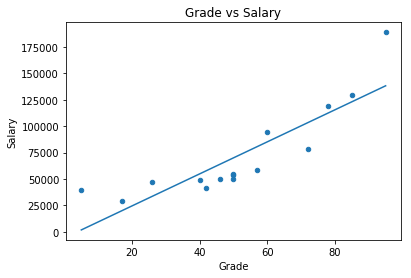

In [7]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic', 'Jimmie', 'Rhonda', 'Giovanni', 'Francesca', 'Rajab', 'Naiyana', 'Kian', 'Jenny'],
                   'Salary':[50000,54000,50000,189000,55000,40000,59000,42000,47000,78000,119000,95000,49000,29000,130000],
                   'Hours':[41,40,36,17,35,39,40,45,41,35,30,33,38,47,24],
                   'Grade':[50,50,46,95,50,5,57,42,26,72,78,60,40,17,85]})

# Cria um gráfico de dispersão/Scatter Plot para comparar as Notas e os Salários.
df.plot(kind='scatter', title='Grade vs Salary', x='Grade', y='Salary')

# Adicione uma linha de melhor ajuste no plot/gráfico
plt.plot(np.unique(df['Grade']), np.poly1d(np.polyfit(df['Grade'], df['Salary'], 1))(np.unique(df['Grade'])))

plt.show()

A linha de melhor ajuste torna mais claro que há alguma colinearidade aparente entre essas variáveis ​​(a relação é colinear se o valor de uma variável aumenta ou diminui em linha com a outra).

# 5. Correlação

A relação aparentemente colinear que você viu no gráfico de dispersão pode ser verificada pelo cálculo de uma estatística que quantifica a relação entre as duas variáveis. A estatística geralmente usada para fazer isso é a correlação , embora também haja uma estatística chamada covariância às vezes usada. Correlação é geralmente preferida porque o valor que ela produz é mais facilmente interpretado.  
  
Um valor de correlação é sempre um número entre __-1__ e __1__.  
  
 - Um valor positivo indica uma correlação positiva (conforme o valor da variável x aumenta, o mesmo acontece com o valor da variável y);  
 - Um valor negativo indica uma correlação negativa (conforme o valor da variável x aumenta, o valor da variável y diminui);  
 - Quanto mais próximo de zero o valor de correlação é, mais fraca é a correlação entre x e y;  
 - Uma correlação de exatamente zero significa que não há relação aparente entre as variáveis.  
  
A fórmula para calcular a correlação é:  
  
\begin{equation}r_{x,y} = \frac{\displaystyle\sum_{i=1}^{n} (x_{i} -\bar{x})(y_{i} -\bar{y})}{\sqrt{\displaystyle\sum_{i=1}^{n} (x_{i} -\bar{x})^{2}(y_{i} -\bar{y})^{2}}}\end{equation}  
  
**r<sub>x, y</sub>** é a notação para a correlação entre __x__ e __y__.  
  
A fórmula é bastante complexa, mas, felizmente, o Python torna muito fácil calcular a correlação usando a função __corr()__: 

In [8]:
import pandas as pd

df = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic'],
                   'Salary':[50000,54000,50000,189000,55000,40000,59000],
                   'Hours':[41,40,36,17,35,39,40],
                   'Grade':[50,50,46,95,50,5,57]})

# Tira a correlação entre as Notas e os Salários dos alunos.
print(df['Grade'].corr(df['Salary']))

0.8149286388911882


Nesse caso, a correlação é de pouco mais de 0,8; tornando-se uma correlação positiva razoavelmente alta que indica aumentos salariais de acordo com o notas.  
  
__NOTE:__  
Vamos ver se podemos encontrar uma correlação entre __notas__ e __horas trabalhadas por semana__:

Correlation: -0.8109119058459785


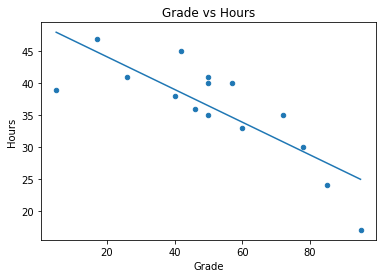

In [9]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic', 'Jimmie', 'Rhonda', 'Giovanni', 'Francesca', 'Rajab', 'Naiyana', 'Kian', 'Jenny'],
                   'Salary':[50000,54000,50000,189000,55000,40000,59000,42000,47000,78000,119000,95000,49000,29000,130000],
                   'Hours':[41,40,36,17,35,39,40,45,41,35,30,33,38,47,24],
                   'Grade':[50,50,46,95,50,5,57,42,26,72,78,60,40,17,85]})

r = df['Grade'].corr(df['Hours']) # Tira a correção entre as Notas e as Horas trabalhadas por semana.
print('Correlation: ' + str(r)) # Imprime a correlação tirada.

# Cria um gráfico de dispersão/Scatter Plot para comparar as Notas e Horas trabalhadas por semana.
df.plot(kind='scatter', title='Grade vs Hours', x='Grade', y='Hours')

# Adicione uma linha de melhor ajuste no plot/gráfico
plt.plot(np.unique(df['Grade']), np.poly1d(np.polyfit(df['Grade'], df['Hours'], 1))(np.unique(df['Grade'])))
plt.show()

Nesse caso, o valor de correlação está abaixo de -0,8; significando uma correlação negativa bastante forte na qual o número de horas trabalhadas diminui à medida que a nota aumenta. A linha de melhor ajuste no gráfico de dispersão corrobora essa estatística.  
  
É importante lembrar que a correlação não é causação. Em outras palavras, mesmo que haja um relacionamento aparente, você não pode dizer com certeza que uma variável é a causa da outra. Neste exemplo, podemos dizer:  

 - Que os alunos que alcançaram notas mais altas tendem a trabalhar menos horas;  
 - Mas __não podemos dizer__ que aqueles que trabalham menos tempo fazem isso porque alcançaram uma nota alta!